# Library visualiser

## Purpose
Ability to quickly visualise dependencies within a python library or collection of files. Mostly useful when analysing other people's code


## Plan
### Basic Features
1. DONE Find all functions from a file and write them to a list of internal functions - base off of RegEx searching for def
2. DONE Find any function which is used anywhere in the code
3. DONE Write them as nodes and edges

### Advanced Features
1. Run through all .py files in a directory and associate each with all its functions
2. Be able to associate a function to its class and file
3. Be able to track data and highly repeatable variables through the code, i.e. be able to also show a graph that shows how a variable keeps on being passed through functions if it occurs often
4. Consider dependencies to libraries, e.g. which function require a specific dependecy library 

### Debugging
1. DONE Check whether this is complete name but including a check for an open bracket (
2. Consider false positives where functions have similar names, eg load_file & load_file_worker could be confused
3. Consider similar names of different classes e.g. debug & self.local_logger.debug, different inits
4. Range search for a dependency - consider a function call within a function within a function ==> this will be a false positive as the function call will be listed to belong to both
5. Identify functions in functions based on their indent


In [22]:
import graphviz
import re
import pandas as pd
from graphviz import Digraph

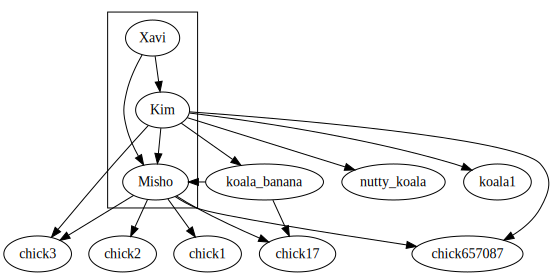

In [157]:

### 1. READ FILE CONTENTS LINE BY LINE
with open('test.py') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.replace('\n','') for x in content] 


### 2. RUN THROUGH FILE TO DETERMINE FUNCTION LIST
func_list=[]
#idx=0
for (idx,code_line) in enumerate(content):
    if re.search("\s*def",code_line):
        func_name=re.split('[(]', re.split("def ", code_line)[1])[0]
        depth=len(re.split("def ", code_line)[0])
        func_list=func_list+[[func_name,depth,idx]]
    #idx+=1
    

### 3. EXPAND FUNCTION LIST WITH START AND END AND INDENT
func_df=pd.DataFrame(func_list,columns=['Name','Indent','Start'])
func_df['End']=func_df.Start.shift(-1)-1
func_df.loc[len(func_df)-1,'End']=len(content)


'''
# Stub - for identification of function within function
indent_lev=list(set(func_df.Indent))
for indent in indent_lev:
    df_lev=func_df[func_df.Indent==indent]
    #for i in range(len(df_lev)):
'''

    
### 4. BUILDING THE GRAPH
g = Digraph('G')


g.attr(compound='true')



#g.attr('node', shape='circle')
for func in func_df.Name:

    g.node(func)
    # For each function
    for (idx,code_line) in enumerate(content):
        # We run through each line of code to confirm if present
        if re.search(func + '[(]',code_line):
            #Should there be a hit, we confirm if it is within any of the known functions
            for (i_df,_) in enumerate(func_df):
                # Confirm which functions is this a part of 
                if (idx>func_df.Start[i_df]) & (idx<=func_df.End[i_df]):
                    g.edge(func_df.Name[i_df], func)
with g.subgraph(name='cluster1') as c:
    c.node('Misho')
    c.node('Xavi')    
    c.node('Kim')                       
g


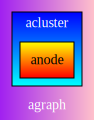

In [159]:
from graphviz import Graph

g = Graph('G', filename='g_c_n.gv')
g.attr(bgcolor='purple:pink', label='agraph', fontcolor='white')

with g.subgraph(name='cluster1') as c:
    c.attr(fillcolor='blue:cyan', label='acluster', fontcolor='white',
           style='filled', gradientangle='270')
    c.attr('node', shape='box', fillcolor='red:yellow',
           style='filled', gradientangle='90')
    c.node('anode')

g

In [148]:
func_df

,Name,Indent,Start,End
0,Misho,4,1,7.0
1,Kim,4,8,14.0
2,Xavi,4,15,18.0
3,koala_banana,4,19,22.0
4,nutty_koala,4,23,26.0
5,koala1,4,27,28.0
6,chick1,4,29,31.0
7,chick2,4,32,33.0
8,chick3,4,34,35.0
9,chick17,4,36,37.0


In [158]:
content

['class Dungarov:',
 '    def Misho():',
 '',
 '        Dungarov.chick1()',
 '        chick3()  ',
 '        chick17()',
 '        chick2()',
 '        chick657087()    ',
 '    def Kim():',
 '        Dungarov.Misho()',
 '        koala1()',
 '        koala_banana()',
 '        nutty_koala()',
 '        chick3() ',
 '        chick657087()          ',
 '    def Xavi():',
 '        Dungarov.Kim()',
 '        Dungarov.Misho()',
 '        ',
 '    def koala_banana()',
 '        Misho()',
 '        chick17()',
 '',
 '    def nutty_koala()',
 '        Misho()',
 '        chick1()',
 '',
 '    def koala1()',
 '',
 '    def chick1():',
 '        print(1)',
 '        ',
 '    def chick2():',
 '        print(1)',
 '    def chick3():',
 '        print(1)',
 '    def chick17():',
 '        print(1)',
 '    def chick657087():',
 '        print(1)']